[Day 13: Transparent Origami](https://adventofcode.com/2021/day/13)

In [1]:
import numpy as np
from matplotlib.pyplot import imshow

In [2]:
with open('../input/D13.txt', 'r') as f:
    instructions = [i.strip() for i in f.readlines()]
points, fold_instructions = np.array([tuple([int(i) for i in x.split(',')]) for x in instructions[:-13]]), [(x.replace('fold along ','').split('=')[0], int(x.replace('fold along ','').split('=')[1])) for x in instructions[-12:]]

In [24]:
paper = np.zeros(points.max(axis=0)+1)
for x,y in points:
    paper[x, y] = 1

In [13]:
def find_code_from_paper(paper, fold_instructions):
    for instruction in fold_instructions:
        if instruction[0]=='x':
            paper = paper[:instruction[1], :]+np.flip(paper[instruction[1]+1:, :], axis=0)
        elif instruction[0]=='y':
            paper = paper[:, :instruction[1]]+np.flip(paper[:, instruction[1]+1:], axis=1)
    return paper

In [14]:
np.sum(find_code_from_paper(paper, fold_instructions[:1])>0)

765

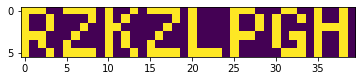

In [15]:
imshow((find_code_from_paper(paper, fold_instructions)>0).T);